In [3]:
'''
apt install python3-pip
pip install -r requirements.txt

'''

'\napt install python3-pip\npip install -r requirements.txt\n\n'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [5]:
df = pd.read_csv('INFLUD18.csv', sep = ';', encoding = 'ISO-8859-1')

C:\Users\OtávioOliveira\AppData\Local\Temp\ipykernel_18876\138030827.py:1: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('INFLUD18.csv', sep = ';', encoding = 'ISO-8859-1')


In [6]:
df.head()

,DT_NOTIFIC,ID_MUNICIP,SEM_NOT,NU_ANO,SG_UF_NOT,DT_SIN_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,...,RES_PARA2,RES_PARA3,DESC_RESP,SATURACAO,ST_TIPOFI,TIPO_PCR,ANTIVIRAL,SUPORT_VEN,RES_VSR,RES_FLUASU
0,27/04/2018,110001,201817,2018,11,27/04/2018,22/02/1983,4035,F,5.0,...,NaN,NaN,1.0,2.0,2,NaN,1.0,1.0,NaN,NaN
1,19/04/2018,110001,201816,2018,11,15/04/2018,16/08/2014,4003,M,6.0,...,NaN,NaN,1.0,2.0,2,NaN,1.0,1.0,NaN,NaN
2,27/04/2018,110001,201817,2018,11,20/04/2018,26/01/2003,4015,F,5.0,...,NaN,NaN,1.0,2.0,2,NaN,NaN,1.0,NaN,NaN
3,12/04/2018,110001,201815,2018,11,09/04/2018,17/09/2016,4001,F,6.0,...,NaN,NaN,1.0,2.0,2,NaN,1.0,3.0,NaN,NaN
4,19/04/2018,110001,201816,2018,11,15/04/2018,09/02/2018,3002,M,6.0,...,NaN,NaN,1.0,2.0,2,NaN,1.0,1.0,NaN,NaN


Pré-processamento dos dados

In [7]:
#elegemos a segintes variáveis como valiosas para nossa solução
valuable_infos = ['VACINA','FEBRE','TOSSE','CALAFRIO','DISPNEIA','GARGANTA','ARTRALGIA','MIALGIA','CONJUNTIV','CORIZA','DIARREIA','CARDIOPATI','PNEUMOPATI','RENAL','HEMOGLOBI','IMUNODEPRE','TABAGISMO','METABOLICA','NU_IDADE_N', 'CLASSI_FIN']

#removendo todas as colunas que não temos interesse
for x in df:
  if(not x in valuable_infos):
    df = df.drop(x, axis='columns')

#removendo todas as colunas com mais de 75% de ausência de dados
for x in valuable_infos:
  if(df[x].isnull().sum() > len(df)*3/4):
    df = df.drop(x, axis='columns')

In [8]:
print(df.head())
print(df.isnull().sum())

   NU_IDADE_N  VACINA  FEBRE  TOSSE  DISPNEIA  GARGANTA  MIALGIA  CARDIOPATI  \
0        4035     2.0    1.0    2.0       1.0       2.0      1.0         2.0   
1        4003     1.0    1.0    1.0       1.0       1.0      1.0         2.0   
2        4015     2.0    1.0    1.0       1.0       2.0      1.0         2.0   
3        4001     1.0    1.0    1.0       2.0       1.0      1.0         2.0   
4        3002     2.0    1.0    2.0       2.0       2.0      1.0         2.0   

   PNEUMOPATI  RENAL  IMUNODEPRE  METABOLICA  CLASSI_FIN  
0         2.0    2.0         2.0         2.0         4.0  
1         2.0    2.0         2.0         2.0         4.0  
2         2.0    2.0         2.0         2.0         4.0  
3         2.0    2.0         2.0         2.0         4.0  
4         1.0    2.0         2.0         2.0         4.0  
NU_IDADE_N       0
VACINA         901
FEBRE          220
TOSSE          152
DISPNEIA       328
GARGANTA       898
MIALGIA       1024
CARDIOPATI     986
PNEUMOPATI   

In [9]:
#como das colunas que restaram tivemos muito poucos dados ausentes,
#decidimos simplesmente remover todas as linhas com alguma ausência
initial_dataset_length = len(df)
rows_to_be_removed = []
for index, row in df.iterrows():
  if(row.isnull().values.any()):
    rows_to_be_removed.append(index)

df = df.drop(index=rows_to_be_removed)
df = df.reset_index(drop=True)
print(df.head())

current_dataset_length = len(df)
n_removed_rows = initial_dataset_length - current_dataset_length
percentage_preserved_rows = round(current_dataset_length/initial_dataset_length, 2)
print(f'number of rows removed from datase {n_removed_rows}, ou seja, preservamos {percentage_preserved_rows}% do dataset')

   NU_IDADE_N  VACINA  FEBRE  TOSSE  DISPNEIA  GARGANTA  MIALGIA  CARDIOPATI  \
0        4035     2.0    1.0    2.0       1.0       2.0      1.0         2.0   
1        4003     1.0    1.0    1.0       1.0       1.0      1.0         2.0   
2        4015     2.0    1.0    1.0       1.0       2.0      1.0         2.0   
3        4001     1.0    1.0    1.0       2.0       1.0      1.0         2.0   
4        3002     2.0    1.0    2.0       2.0       2.0      1.0         2.0   

   PNEUMOPATI  RENAL  IMUNODEPRE  METABOLICA  CLASSI_FIN  
0         2.0    2.0         2.0         2.0         4.0  
1         2.0    2.0         2.0         2.0         4.0  
2         2.0    2.0         2.0         2.0         4.0  
3         2.0    2.0         2.0         2.0         4.0  
4         1.0    2.0         2.0         2.0         4.0  
number of rows removed from datase 3963, ou seja, preservamos 0.92% do dataset


In [10]:
#Agora discretizaremos a coluna 'NU_IDADE_N' nas seguintes categorias:
  # Bebê: até 1 ano de idade = 0
  # Criança: 1 a 12 anos de idade = 1
  # Adolescente: 13 a 18 anos de idade = 2
  # Jovem adulto: 19 a 35 anos de idade = 3
  # Adulto: 36 a 59 anos de idade = 4
  # Idoso: 60 anos ou mais = 5

def get_faixa_etaria(age_in_years):
  if(age_in_years <= 12):
    return 1
  elif(age_in_years <= 18):
    return 2
  elif(age_in_years <= 35):
    return 3
  elif(age_in_years <= 59):
    return 4
  return 5

faixa_etaria_col = []
for index, row in df.iterrows():
  age_var = int(row['NU_IDADE_N'])
  if(age_var < 1000):
    print('aaaaaaaa')
  if(age_var < 4000):
    faixa_etaria_col.append(0)
    continue
  
  age_in_years = age_var - 4000
  faixa_etaria_col.append(get_faixa_etaria(age_in_years))

df['FAIXA_ETARIA'] = faixa_etaria_col


In [11]:
df.head(50)

,NU_IDADE_N,VACINA,FEBRE,TOSSE,DISPNEIA,GARGANTA,MIALGIA,CARDIOPATI,PNEUMOPATI,RENAL,IMUNODEPRE,METABOLICA,CLASSI_FIN,FAIXA_ETARIA
0,4035,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,3
1,4003,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1
2,4015,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2
3,4001,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1
4,3002,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,0
5,4003,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1
6,4002,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1
7,3005,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,0
8,4022,9.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,3
9,4001,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1


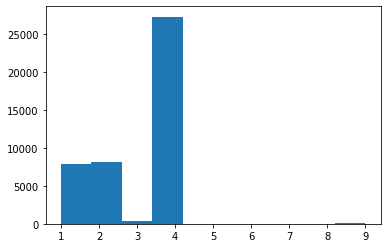

In [12]:
plt.hist(df['CLASSI_FIN'])
plt.show() 

In [13]:
mp = {}
for x in range(10):
  mp[x] = 0

for index, row in df.iterrows():
  mp[row['CLASSI_FIN']] += 1

print(mp)

total = 0
for x in mp:
  if(x != 1):
    total += mp[x]
print(total)

{0: 0, 1: 7893, 2: 8136, 3: 316, 4: 27295, 5: 0, 6: 0, 7: 0, 8: 0, 9: 153}
35900


In [14]:
important_cols = ['VACINA','FEBRE','TOSSE','DISPNEIA','GARGANTA','MIALGIA','CARDIOPATI','PNEUMOPATI','RENAL','IMUNODEPRE','METABOLICA','CLASSI_FIN', 'DT_NASC']

for x in df:
  if not x in important_cols:
    df = df.drop(x, axis=1)

rows_to_be_removed = []
for index, row in df.iterrows():
  if(row.isnull().values.any()):
    # print(row)
    # print(index)
    rows_to_be_removed.append(index)

df = df.drop(index=rows_to_be_removed)
print(df.head())

   VACINA  FEBRE  TOSSE  DISPNEIA  GARGANTA  MIALGIA  CARDIOPATI  PNEUMOPATI  \
0     2.0    1.0    2.0       1.0       2.0      1.0         2.0         2.0   
1     1.0    1.0    1.0       1.0       1.0      1.0         2.0         2.0   
2     2.0    1.0    1.0       1.0       2.0      1.0         2.0         2.0   
3     1.0    1.0    1.0       2.0       1.0      1.0         2.0         2.0   
4     2.0    1.0    2.0       2.0       2.0      1.0         2.0         1.0   

   RENAL  IMUNODEPRE  METABOLICA  CLASSI_FIN  
0    2.0         2.0         2.0         4.0  
1    2.0         2.0         2.0         4.0  
2    2.0         2.0         2.0         4.0  
3    2.0         2.0         2.0         4.0  
4    2.0         2.0         2.0         4.0  


In [15]:
len(df)

43793

In [16]:
important_cols = ['VACINA','FEBRE','TOSSE','DISPNEIA','GARGANTA','MIALGIA','CARDIOPATI','PNEUMOPATI','RENAL','IMUNODEPRE','METABOLICA','CLASSI_FIN']

for x in df:
  # print(df[x].isnull().sum())
  # if(df[x].isnull().sum() <  2000):
  if(df[x].isnull().sum() < 2000):
    print(x)

VACINA
FEBRE
TOSSE
DISPNEIA
GARGANTA
MIALGIA
CARDIOPATI
PNEUMOPATI
RENAL
IMUNODEPRE
METABOLICA
CLASSI_FIN


In [17]:
missin_values_interval = [] #0-25, 25-50, 50-75, 75-100
for column in df:
  if(df[column].isnull().sum() < n_lines / 4): 
    print(column)
    missin_values_interval.append('0-25')
  elif(df[column].isnull().sum() < n_lines / 2): 
    missin_values_interval.append('25-50')
  elif(df[column].isnull().sum() < n_lines * 3 / 4): 
    missin_values_interval.append('50-75')
  else:
    # print(column)
    missin_values_interval.append('75-100')

missin_values_interval.sort()
plt.hist(missin_values_interval)
plt.show() 

NameError: name 'n_lines' is not defined

In [ ]:
import numpy as np
for x in df:
  arr = []
  for y in df[x]:
    if(not np.isnan(y)):
      arr.append(y);
  print(x);
  plt.hist(arr)
  plt.show() 

In [ ]:
plt.hist(df['CLASSI_FIN'])
plt.show() 

In [ ]:
for x in df:
  print(x)